# **IMPORTING REQUIRED LIBRARIES**




In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import random
import pydotplus

warnings.filterwarnings('ignore') 
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
from pylab import rcParams 
from matplotlib.cm import rainbow
from prettytable import PrettyTable 
# from sklearn.metrics import jaccard_similarity_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

#Reena Prabha M

# **IMPORTING THE DATASET**

In [ ]:
#importing the dataset
df = pd.read_csv('/content/cardio_train.csv')
df = pd.DataFrame(df)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,target
0,0,18393,2,168,62,0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,0,100,60,1,1,0,0,0,0


In [ ]:
#specifies rows and columns
df.shape


(70000, 14)

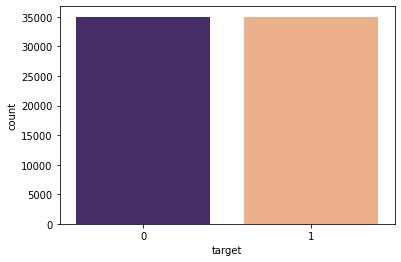

In [ ]:
#to check if the data is balanced
sns.countplot(df['target'],palette=['#432371',"#FAAE7B"])#Show the counts of observations
plt.show()


In [ ]:
print("Null values :: ")
print(df.isnull() .sum())


Null values :: 
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
target         0
dtype: int64


DUPLICATION CHECK

In [ ]:
#Check duplicate rows in data
# duplicate_rows = df[df.duplicated()]
# print("Number of duplicate rows :: ", duplicate_rows.shape)
# print(duplicate_rows)


In [ ]:
# #Removing the duplicate row
# df = df.drop_duplicates()
# duplicate_rows = df[df.duplicated()]
# print("Number of duplicate rows :: ", duplicate_rows.shape)
# print(duplicate_rows)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
 13  target       70000 non-null  int64
dtypes: int64(14)
memory usage: 7.5 MB


# **CORRELATION MATRIX**

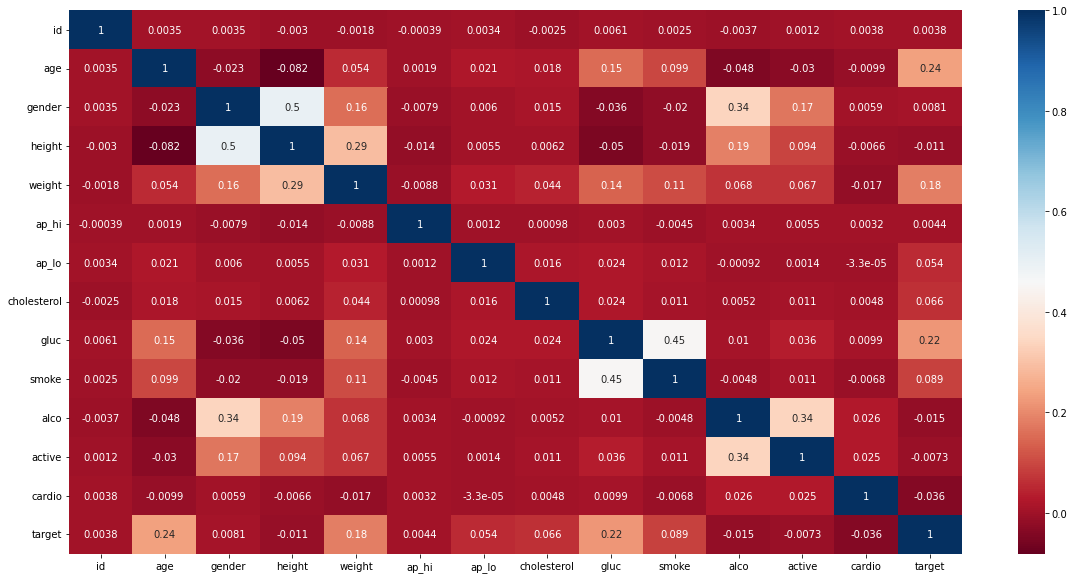

In [ ]:
#Visualization of Correlation of attributes with HeatMap 
plt.figure(figsize = (20,10))
c = df.corr()
sns.heatmap(c, cmap = 'RdBu', annot = True)
plt.show()


# **ONE HOT ENCODING**

In [ ]:
x= df.iloc[:,:-1] 
y= df.iloc[:,-1] 

#df = pd.get_dummies(df, columns = ['cp','restecg','slope','ca','thal'])

# standardScaler = StandardScaler() #removes the mean and scales each feature/variable to unit variance.
# columns_to_scale = ['age','trestbps','chol','thalach','exang','oldpeak']
# df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])#fit_transform() is used for the initial fitting of parameters on the training set x, while also returning the transformed x
# display(df)


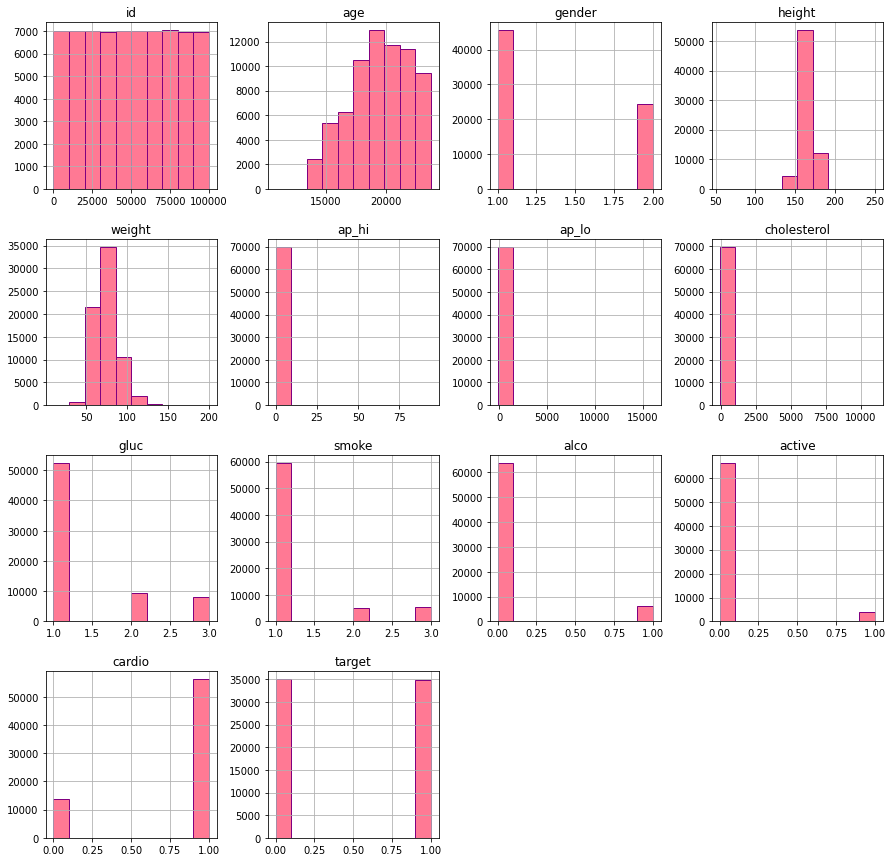

In [ ]:
df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
plt.show()

# **FEATURE SELCTION** 

Pearson

In [ ]:
#Correlation with output variable
c_target = abs(c["target"])
#Selecting highly correlated features
relevant_features = c_target[c_target>0.1]
relevant_features

age       0.238159
weight    0.181657
gluc      0.221147
target    1.000000
Name: target, dtype: float64

In [ ]:
df = df[["age","weight","gluc","target"]]
df.head()

,age,weight,gluc,target
0,18393,62,1,0
1,20228,85,3,1
2,18857,64,3,1
3,17623,82,1,1
4,17474,56,1,0


Lasso

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [ ]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [ ]:
search.fit(x_train,y_train)

In [ ]:
search.best_params_

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
importance = np.abs(coefficients)

In [ ]:
print(importance)

In [ ]:
df = df[["age","sex","cp","trestbps","fbs","restecg","slope","target"]]
df.head()

In [ ]:
df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
plt.show()

In [ ]:
x= df.iloc[:,:-1] 
y= df.iloc[:,-1] 

In [ ]:
random.seed(10) 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=10)
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

# **NORMALIZATION**

In [ ]:
cols_to_norm = ["age","weight","gluc","target"]
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
display(df)
# df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - np.mean(x)) / (np.std(x)))
# display(df)  

,age,weight,gluc,target
0,0.588076,0.273684,0.0,0.0
1,0.730159,0.394737,1.0,1.0
2,0.624003,0.284211,1.0,1.0
3,0.528455,0.378947,0.0,1.0
4,0.516918,0.242105,0.0,0.0
...,...,...,...,...
69995,0.653659,0.347368,0.0,0.0
69996,0.913899,0.610526,0.5,1.0
69997,0.640186,0.500000,1.0,1.0
69998,0.900736,0.326316,0.0,1.0


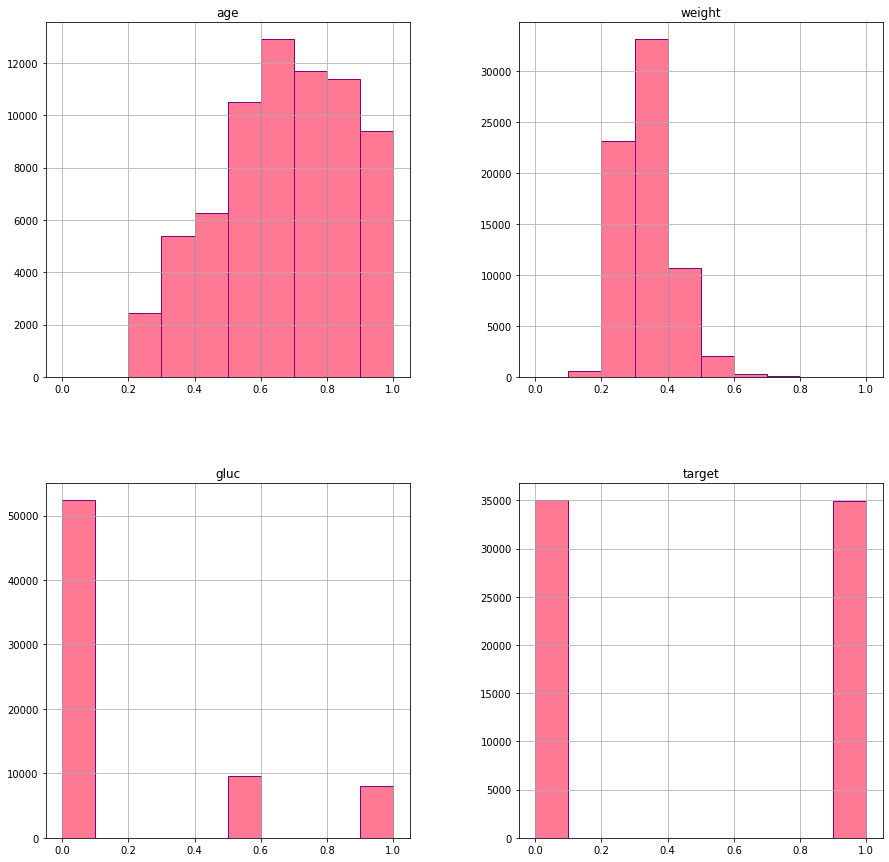

In [ ]:
df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
plt.show()

# **SPLITTING THE DATASET INTO TRAINING AND TESTING**

In [ ]:
random.seed(10) 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=10)
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

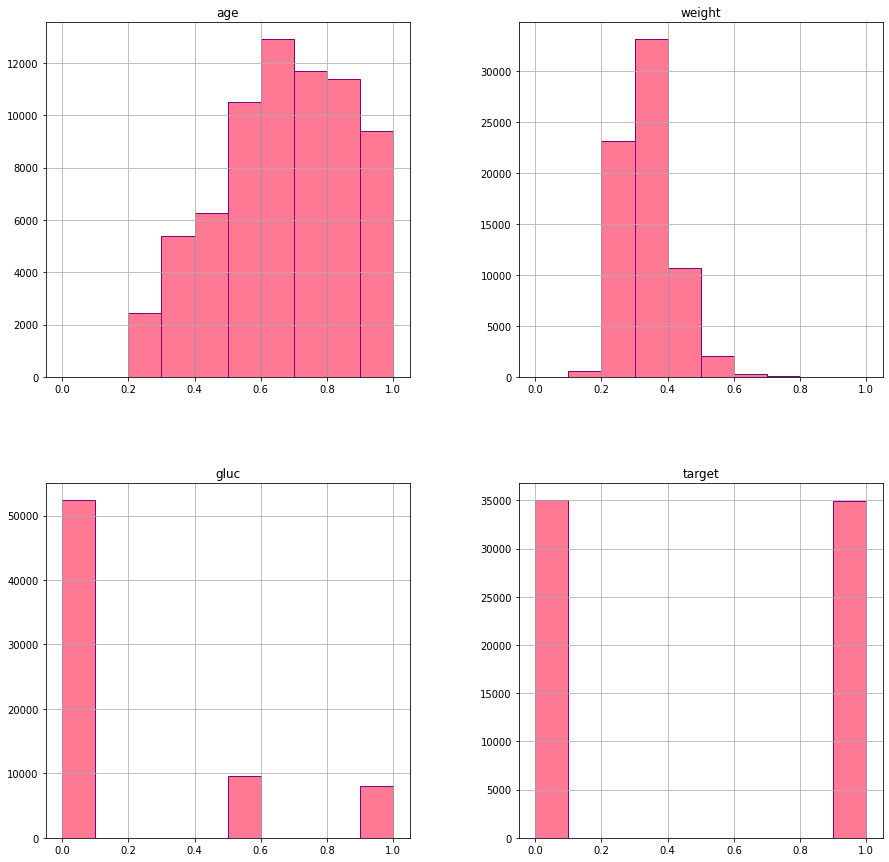

In [ ]:
df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
plt.show()

# **CROSS VALIDATION**

In [ ]:
# #Importing required libraries
# from sklearn.datasets import load_breast_cancer
# import pandas as pd
# from sklearn.model_selection import KFold 
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
 
 
# #Implementing cross validation
 
# k = 5
# kf = KFold(n_splits=k, random_state=None)
 
# for train_index , test_index in kf.split(x):
#     x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
#     y_train , y_test = y[train_index] , y[test_index]
#     print("%s %s" % (train_index, test_index))

# # scoresT = cross_val_score(df, x, y, cv=5)
# # print(scoresT)

# **K-NEAREST NEIGHBORS**


**CHECKING FOR THE BEST K VALUE**

Minimum error:- 0.3705 at K = 9


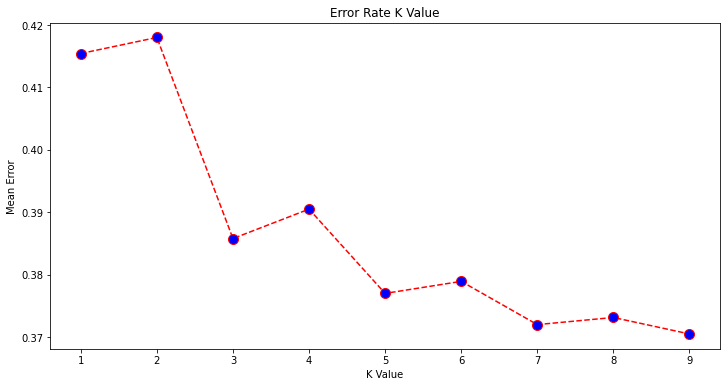

In [ ]:
error = []

# Calculating error for K values between 1 and 30
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    #print(error.append(np.mean(pred_i != y_test)))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)


**TRAINING**

In [ ]:
#print(pd.DataFrame(x_train))


3 METRICS OF KNN

In [ ]:
#3 metrics
KNN_mi= KNeighborsClassifier(n_neighbors=5, metric = 'minkowski') 
KNN_e= KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
KNN_ma= KNeighborsClassifier(n_neighbors=5, metric = 'manhattan',weights='uniform')
KNN_j= KNeighborsClassifier(n_neighbors=5, metric = 'jaccard')
KNN_h= KNeighborsClassifier(n_neighbors=5, metric = 'hamming')
KNN_c= KNeighborsClassifier(n_neighbors=5, metric = 'cosine')

KNN_mi.fit(x_train, y_train)
KNN_e.fit(x_train, y_train)
KNN_ma.fit(x_train, y_train)
KNN_j.fit(x_train, y_train)
KNN_h.fit(x_train, y_train)
KNN_c.fit(x_train, y_train)

y_pred_mi= KNN_mi.predict(x_test)
y_pred_e= KNN_e.predict(x_test)
y_pred_ma= KNN_ma.predict(x_test)
y_pred_j= KNN_j.predict(x_test)
y_pred_h= KNN_h.predict(x_test)
y_pred_c= KNN_c.predict(x_test)

print('\nKNN Minkowski Prediction:\n',y_pred_mi)
print('\nKNN Euclidean Prediction:\n',y_pred_e)
print('\nKNN Manhattan Prediction:\n',y_pred_ma)
print('\nKNN Jaccard Prediction:\n',y_pred_j)
print('\nKNN Hamming Prediction:\n',y_pred_h)
print('\nKNN Cosine Prediction:\n',y_pred_c)



KNN Minkowski Prediction:
 [0 0 0 ... 1 1 1]

KNN Euclidean Prediction:
 [0 0 0 ... 1 1 1]

KNN Manhattan Prediction:
 [0 0 0 ... 1 0 0]

KNN Jaccard Prediction:
 [0 0 0 ... 0 0 0]

KNN Hamming Prediction:
 [0 0 0 ... 0 1 1]

KNN Cosine Prediction:
 [0 0 0 ... 1 1 1]


**CONFUSION MATRIX**

Manhattan Metric


 CLASSIFICATION REPORT OF MANHATTAN METRIC:

               precision    recall  f1-score   support

           0       0.64      0.67      0.66      7073
           1       0.65      0.62      0.63      6927

    accuracy                           0.64     14000
   macro avg       0.65      0.64      0.64     14000
weighted avg       0.65      0.64      0.64     14000


 RECALL SCORE OF MANHATTAN METRIC :  0.5092933161847616

 PRECISION SCORE OF MANHATTAN METRIC :  0.5635931506855867

 F1 SCORE OF MANHATTAN METRIC :  0.4796439882124612




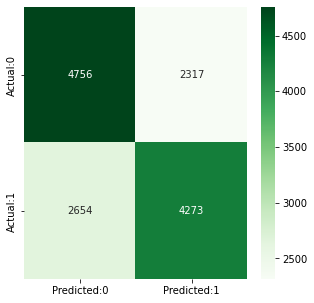

In [ ]:
 from sklearn.model_selection import cross_val_score
 
cm_ma=confusion_matrix(y_test, y_pred_ma)
print('\n CLASSIFICATION REPORT OF MANHATTAN METRIC:\n\n',classification_report(y_test, y_pred_ma))
cm_ma = pd.DataFrame(data = cm_ma, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_ma_r= cross_val_score(KNN_ma, x, y, scoring="recall", cv = 5).mean()
KNN_ma_p= cross_val_score(KNN_ma, x, y, scoring="precision", cv = 5).mean()
KNN_ma_f1=cross_val_score(KNN_ma, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF MANHATTAN METRIC : ',KNN_ma_r)
print('\n PRECISION SCORE OF MANHATTAN METRIC : ',KNN_ma_p)
print('\n F1 SCORE OF MANHATTAN METRIC : ',KNN_ma_f1)
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_ma, annot = True, fmt ='d', cmap = "Greens")
plt.show()


Minkowski Metric


 CLASSIFICATION REPORT OF MINKOWSKI METRIC:

               precision    recall  f1-score   support

           0       0.62      0.64      0.63      7073
           1       0.62      0.60      0.61      6927

    accuracy                           0.62     14000
   macro avg       0.62      0.62      0.62     14000
weighted avg       0.62      0.62      0.62     14000


 RECALL SCORE OF MINKOWSKI METRIC :  0.6019922044174968

 PRECISION SCORE OF MINKOWSKI METRIC :  0.623225227918099

 F1 SCORE OF MINKOWSKI METRIC :  0.6124247319723896




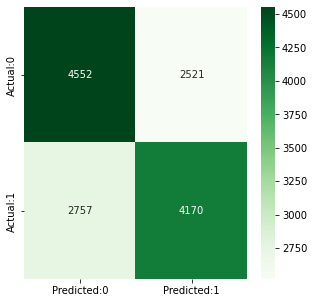

In [ ]:
cm_mi=confusion_matrix(y_test, y_pred_mi)
print('\n CLASSIFICATION REPORT OF MINKOWSKI METRIC:\n\n',classification_report(y_test, y_pred_mi))
cm_mi = pd.DataFrame(data = cm_mi, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_mi_r=cross_val_score(KNN_mi, x, y, scoring="recall", cv = 5).mean()
KNN_mi_p=cross_val_score(KNN_mi, x, y, scoring="precision", cv = 5).mean()
KNN_mi_f1=cross_val_score(KNN_mi, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF MINKOWSKI METRIC : ', recall_score(y_test, y_pred_mi))
print('\n PRECISION SCORE OF MINKOWSKI METRIC : ', precision_score(y_test, y_pred_mi))
print('\n F1 SCORE OF MINKOWSKI METRIC : ', f1_score(y_test, y_pred_mi))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_mi, annot = True, fmt ='d', cmap = "Greens")
plt.show()


Euclidean Metric


 CLASSIFICATION REPORT OF EUCLIDEAN METRIC:

               precision    recall  f1-score   support

           0       0.62      0.64      0.63      7073
           1       0.62      0.60      0.61      6927

    accuracy                           0.62     14000
   macro avg       0.62      0.62      0.62     14000
weighted avg       0.62      0.62      0.62     14000


 RECALL SCORE OF EUCLIDEAN METRIC :  0.6019922044174968

 PRECISION SCORE OF EUCLIDEAN METRIC :  0.623225227918099

 F1 SCORE OF EUCLIDEAN METRIC :  0.6124247319723896




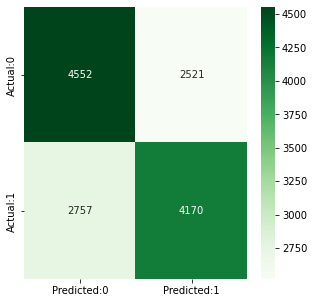

In [ ]:
cm_e=confusion_matrix(y_test, y_pred_e)
print('\n CLASSIFICATION REPORT OF EUCLIDEAN METRIC:\n\n',classification_report(y_test, y_pred_e))
cm_e = pd.DataFrame(data = cm_e, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_e_r=cross_val_score(KNN_e, x, y, scoring="recall", cv = 5).mean()
KNN_e_p=cross_val_score(KNN_e, x, y, scoring="precision", cv = 5).mean()
KNN_e_f1=cross_val_score(KNN_e, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF EUCLIDEAN METRIC : ', recall_score(y_test, y_pred_e))
print('\n PRECISION SCORE OF EUCLIDEAN METRIC : ', precision_score(y_test, y_pred_e))
print('\n F1 SCORE OF EUCLIDEAN METRIC : ', f1_score(y_test, y_pred_e))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_e, annot = True, fmt ='d', cmap = "Greens")
plt.show()

#(actual(t)==prediction(t)) (actual(t)!=prediction(t))
#(actual(t)!=prediction(t)) (actual(t)==prediction(t))
#correct prediction=29+23=52
#wrong prediction=6+3=9
#evaluation metric


Jaccard Metric


 CLASSIFICATION REPORT OF JACCARD METRIC:

               precision    recall  f1-score   support

           0       0.51      1.00      0.67      7073
           1       0.00      0.00      0.00      6927

    accuracy                           0.51     14000
   macro avg       0.25      0.50      0.34     14000
weighted avg       0.26      0.51      0.34     14000


 RECALL SCORE OF JACCARD METRIC :  0.006546790139652965

 PRECISION SCORE OF JACCARD METRIC :  0.5422559009877356

 F1 SCORE OF JACCARD METRIC :  0.012935759141695386




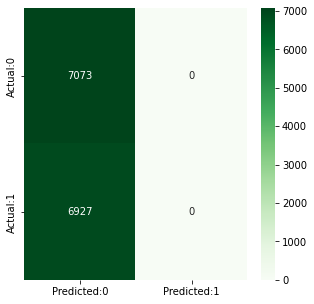

In [ ]:
cm_j=confusion_matrix(y_test, y_pred_j)
print('\n CLASSIFICATION REPORT OF JACCARD METRIC:\n\n',classification_report(y_test, y_pred_j))
cm_j = pd.DataFrame(data = cm_j, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_j_r=cross_val_score(KNN_j, x, y, scoring="recall", cv = 5).mean()
KNN_j_p=cross_val_score(KNN_j, x, y, scoring="precision", cv = 5).mean()
KNN_j_f1=cross_val_score(KNN_j, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF JACCARD METRIC : ',KNN_j_r )
print('\n PRECISION SCORE OF JACCARD METRIC : ',KNN_j_p)
print('\n F1 SCORE OF JACCARD METRIC : ', KNN_j_f1)
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_j, annot = True, fmt ='d', cmap = "Greens")
plt.show()

#(actual(t)==prediction(t)) (actual(t)!=prediction(t))
#(actual(t)!=prediction(t)) (actual(t)==prediction(t))
#correct prediction=29+23=52
#wrong prediction=6+3=9
#evaluation metric


Hamming Metric


 CLASSIFICATION REPORT OF HAMMING METRIC:

               precision    recall  f1-score   support

           0       0.65      0.75      0.69      7073
           1       0.69      0.58      0.63      6927

    accuracy                           0.67     14000
   macro avg       0.67      0.67      0.66     14000
weighted avg       0.67      0.67      0.66     14000


 RECALL SCORE OF HAMMING METRIC :  0.6122815855971614

 PRECISION SCORE OF HAMMING METRIC :  0.7070008669060096

 F1 SCORE OF HAMMING METRIC :  0.6562347742395073




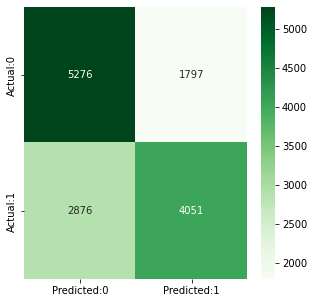

In [ ]:
cm_h=confusion_matrix(y_test, y_pred_h)
print('\n CLASSIFICATION REPORT OF HAMMING METRIC:\n\n',classification_report(y_test, y_pred_h))
cm_h = pd.DataFrame(data = cm_h, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_h_r=cross_val_score(KNN_h, x, y, scoring="recall", cv = 5).mean()
KNN_h_p=cross_val_score(KNN_h, x, y, scoring="precision", cv = 5).mean()
KNN_h_f1=cross_val_score(KNN_h, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF HAMMING METRIC : ', KNN_h_r)
print('\n PRECISION SCORE OF HAMMING METRIC : ',KNN_h_p)
print('\n F1 SCORE OF HAMMING METRIC : ', KNN_h_f1)
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_h, annot = True, fmt ='d', cmap = "Greens")
plt.show()

#(actual(t)==prediction(t)) (actual(t)!=prediction(t))
#(actual(t)!=prediction(t)) (actual(t)==prediction(t))
#correct prediction=29+23=52
#wrong prediction=6+3=9
#evaluation metric


Cosine Metric


 CLASSIFICATION REPORT OF COSINE METRIC:

               precision    recall  f1-score   support

           0       0.62      0.65      0.64      7073
           1       0.63      0.60      0.61      6927

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.62     14000
weighted avg       0.63      0.63      0.63     14000


 RECALL SCORE OF COSINE METRIC :  0.5233835897649673

 PRECISION SCORE OF COSINE METRIC :  0.5691005837793075

 F1 SCORE OF COSINE METRIC :  0.5027503837118564




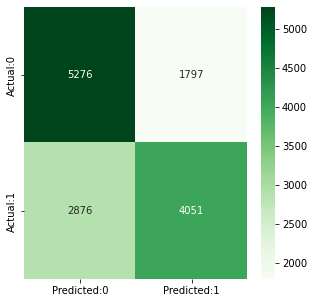

In [ ]:
cm_c=confusion_matrix(y_test, y_pred_c)
print('\n CLASSIFICATION REPORT OF COSINE METRIC:\n\n',classification_report(y_test, y_pred_c))
cm_c = pd.DataFrame(data = cm_h, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_c_r=cross_val_score(KNN_c, x, y, scoring="recall", cv = 5).mean()
KNN_c_p=cross_val_score(KNN_c, x, y, scoring="precision", cv = 5).mean()
KNN_c_f1=cross_val_score(KNN_c, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF COSINE METRIC : ', KNN_c_r)
print('\n PRECISION SCORE OF COSINE METRIC : ',KNN_c_p)
print('\n F1 SCORE OF COSINE METRIC : ',KNN_c_f1)
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_c, annot = True, fmt ='d', cmap = "Greens")
plt.show()

#(actual(t)==prediction(t)) (actual(t)!=prediction(t))
#(actual(t)!=prediction(t)) (actual(t)==prediction(t))
#correct prediction=29+23=52
#wrong prediction=6+3=9
#evaluation metric

**ACCURACY**

In [ ]:
KNN_ma_acc=cross_val_score(KNN_ma, x, y, scoring="accuracy", cv = 5).mean()
KNN_mi_acc=cross_val_score(KNN_mi, x, y, scoring="accuracy", cv = 5).mean()
KNN_e_acc=cross_val_score(KNN_e, x, y, scoring="accuracy", cv = 5).mean()
KNN_j_acc=cross_val_score(KNN_j, x, y, scoring="accuracy", cv = 5).mean()
KNN_h_acc=cross_val_score(KNN_h, x, y, scoring="accuracy", cv = 5).mean()
KNN_c_acc=cross_val_score(KNN_c, x, y, scoring="accuracy", cv = 5).mean()

# print('MANHATTAN:',KNN_ma_acc)
# print('MINKOWSKI:',KNN_mi_acc)
# print('EUCLIDEAN:',KNN_e_acc)
# print('JACCARD:',KNN_j_acc)
# print('HAMMING:',KNN_h_acc)
# print('COSINE :',KNN_c_acc)

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["METRICS", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(["Manhattan",KNN_ma_acc,KNN_ma_p,KNN_ma_r,KNN_ma_f1]) 
myTable.add_row(["Minkowski",KNN_mi_acc,KNN_mi_p,KNN_mi_r,KNN_mi_f1]) 
myTable.add_row(["Euclidean",KNN_e_acc,KNN_e_p,KNN_e_r,KNN_e_f1]) 
myTable.add_row(["Jaccard",KNN_j_acc,KNN_j_p,KNN_j_r,KNN_j_f1]) 
myTable.add_row(["Hamming",KNN_h_acc,KNN_h_p,KNN_h_r,KNN_h_f1]) 
myTable.add_row(["Cosine",KNN_c_acc,KNN_c_p,KNN_c_r,KNN_c_f1]) 
  
print(myTable)


+-----------+--------------------+--------------------+----------------------+----------------------+
|  METRICS  |      ACCURACY      |  PRECISION SCORE   |     RECALL SCORE     |       F1 SCORE       |
+-----------+--------------------+--------------------+----------------------+----------------------+
| Manhattan | 0.5315142857142857 | 0.5635931506855867 |  0.5092933161847616  |  0.4796439882124612  |
| Minkowski | 0.5092142857142857 | 0.5673566967980129 |  0.5050601242167996  | 0.44317868933250065  |
| Euclidean | 0.5092142857142857 | 0.5673566967980129 |  0.5050601242167996  | 0.44317868933250065  |
|  Jaccard  | 0.5008285714285714 | 0.5422559009877356 | 0.006546790139652965 | 0.012935759141695386 |
|  Hamming  | 0.6794428571428572 | 0.7070008669060096 |  0.6122815855971614  |  0.6562347742395073  |
|   Cosine  | 0.536442857142857  | 0.5691005837793075 |  0.5233835897649673  |  0.5027503837118564  |
+-----------+--------------------+--------------------+----------------------+----

# **DECISION TREE ALGORITHM**




 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      7073
           1       0.63      0.63      0.63      6927

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000


 CONFUSION MATRIX



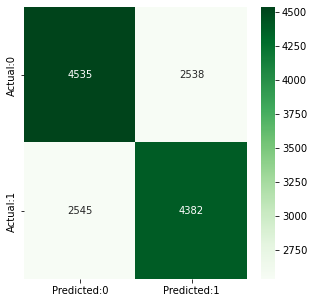


 ACCURACY SCORE  :  0.5861000000000001

 PRECISION SCORE :  0.5774678970133764

 RECALL SCORE :  0.5319384261648953

 F1 SCORE :  0.5427237578804237


In [ ]:
# To find the accuracy result for DTA
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_Pred = DT.predict(x_test)
DT_accuracy = cross_val_score(DT, x, y, scoring="accuracy", cv = 5).mean()
DT_precision = cross_val_score(DT, x, y, scoring="precision", cv = 5).mean()
DT_recall_score = cross_val_score(DT, x, y, scoring="recall", cv = 5).mean()
DT_f1_score = cross_val_score(DT, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', DT_accuracy)
print('\n PRECISION SCORE : ',DT_precision)
print('\n RECALL SCORE : ', DT_recall_score)
print('\n F1 SCORE : ', DT_f1_score)


In [ ]:
# #Tree Prediction
# dot_data = StringIO()
# export_graphviz(DT, out_file=dot_data,filled=True, rounded=True,special_characters=True,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())



 CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.64      0.64      0.64      7073
           1       0.63      0.64      0.64      6927

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000


 CONFUSION MATRIX



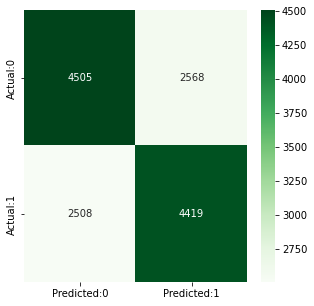


 ACCURACY SCORE  :  0.5938428571428572

 PRECISION SCORE :  0.5858342863955264

 RECALL SCORE :  0.5426007468374657

 F1 SCORE : 0.5514472665500255


In [ ]:
# To find the accuracy result for DTA using ENTROPY algorithm used for calculating information gain...
from sklearn.tree import DecisionTreeClassifier

E_DT = DecisionTreeClassifier(criterion='entropy',splitter ='best',max_depth=None,random_state=0)
E_DT = E_DT.fit(x_train, y_train)
E_DT_Pred = E_DT.predict(x_test)
E_DT_accuracy = cross_val_score(E_DT, x, y, scoring="accuracy", cv = 5).mean()
E_DT_precision = cross_val_score(E_DT, x, y, scoring="precision", cv = 5).mean()
E_DT_recall_score = cross_val_score(E_DT, x, y, scoring="recall", cv = 5).mean()
E_DT_f1_score = cross_val_score(E_DT, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT :', classification_report(y_test, E_DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,E_DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', E_DT_accuracy)
print('\n PRECISION SCORE : ',E_DT_precision)
print('\n RECALL SCORE : ',E_DT_recall_score)
print('\n F1 SCORE :',E_DT_f1_score)


 CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.64      0.64      0.64      7073
           1       0.63      0.64      0.63      6927

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000


 CONFUSION MATRIX



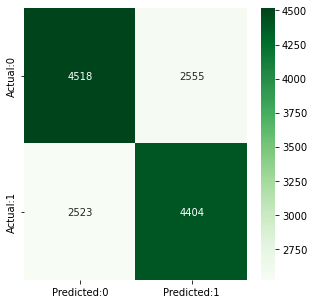


 ACCURACY SCORE  :  0.5883

 PRECISION SCORE :  0.5820578363621124

 RECALL SCORE :  0.5389995058955367

 F1 SCORE : 0.5514472665500255


In [ ]:
# To find the accuracy result for DTA using GINI algorithm used for calculating Gini index...
from sklearn.tree import DecisionTreeClassifier

GI_DT = DecisionTreeClassifier(criterion='gini',splitter ='best',max_depth=None,random_state=0)
GI_DT.fit(x_train, y_train)
GI_DT_Pred = GI_DT.predict(x_test)
GI_DT_accuracy = cross_val_score(GI_DT, x, y, scoring="accuracy", cv = 5).mean()
GI_DT_precision = cross_val_score(GI_DT, x, y, scoring="precision", cv = 5).mean()
GI_DT_recall_score = cross_val_score(GI_DT, x, y, scoring="recall", cv = 5).mean()
GI_DT_f1_score = cross_val_score(GI_DT, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT :', classification_report(y_test,GI_DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,GI_DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', GI_DT_accuracy)
print('\n PRECISION SCORE : ', GI_DT_precision)
print('\n RECALL SCORE : ',GI_DT_recall_score)
print('\n F1 SCORE :',E_DT_f1_score)

RESULT:

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["CRITERIA","Accuracy","Precision", "Recall", "F1"]) 
  
# Add rows 
myTable.add_row(['Information Gain',E_DT_accuracy,E_DT_precision ,E_DT_recall_score ,E_DT_f1_score]) 
myTable.add_row(['Gini Index',GI_DT_accuracy, GI_DT_precision ,GI_DT_recall_score ,GI_DT_f1_score])  
print(myTable)

+------------------+--------------------+--------------------+--------------------+--------------------+
|     CRITERIA     |      Accuracy      |     Precision      |       Recall       |         F1         |
+------------------+--------------------+--------------------+--------------------+--------------------+
| Information Gain | 0.5938428571428572 | 0.5858342863955264 | 0.5426007468374657 | 0.5514472665500255 |
|    Gini Index    |       0.5883       | 0.5820578363621124 | 0.5389995058955367 | 0.5511296571441001 |
+------------------+--------------------+--------------------+--------------------+--------------------+


PREDECTION:

In [ ]:
print("The prediction value for Entropy Method : ")
print(E_DT_Pred)

The prediction value for Entropy Method : 
[0 0 0 ... 1 0 0]


In [ ]:
print("The prediction value for Gini Index Method : ")
print(GI_DT_Pred)

The prediction value for Gini Index Method : 
[0 0 0 ... 1 0 1]


TESTING:

In [ ]:
# # Predicting a new result - target 0
# print(DT.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print(E_DT.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print(GI_DT.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))

In [ ]:
# # Predicting a new result - target 1
# print(DT.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print(E_DT.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print(E_DT.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))

# **RANDOM FOREST ALGORITHM**

contributed by Shree Raksha


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      7073
           1       0.73      0.70      0.71      6927

    accuracy                           0.73     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.73      0.72     14000


 CONFUSION MATRIX
 [[5323 1750]
 [2099 4828]]

 ACCURACY SCORE  :  0.6729714285714286

 PRECISION SCORE :  0.7263503961517666

 RECALL SCORE :  0.6076649048103052

 F1 SCORE : 0.6031633253812587


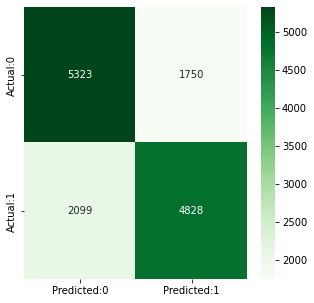

In [ ]:
# To find the accuracy for RFA
from sklearn.ensemble import RandomForestClassifier
    
RDF = RandomForestClassifier()
RDF.fit(x_train,y_train)
RDF_pred = RDF.predict(x_test)
RDF_accuracy = cross_val_score(RDF, x, y, scoring="accuracy", cv = 5).mean()
RDF_precision =  cross_val_score(RDF, x, y, scoring="precision", cv = 5).mean()
RDF_recall_score =  cross_val_score(RDF, x, y, scoring="recall", cv = 5).mean()
RDF_Score =  cross_val_score(RDF, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, RDF_pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, RDF_pred))
print('\n ACCURACY SCORE  : ', RDF_accuracy)
print('\n PRECISION SCORE : ', RDF_precision)
print('\n RECALL SCORE : ',RDF_recall_score)
print('\n F1 SCORE :',RDF_Score)
cm= confusion_matrix(y_test, RDF_pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()


In [ ]:
# #Tree Prediction
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree
# model = RandomForestClassifier(n_estimators=100)
# model.fit(x_train,y_train)

# # Extract single tree
# estimator = model.estimators_[50]

# from sklearn.tree import export_graphviz
# dot_data = StringIO()
# export_graphviz(estimator, out_file=dot_data,filled=True, rounded=True,special_characters=True,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())


In [ ]:
# #Splited based on the sub-tree graph
# from matplotlib.cm import rainbow

# rf_scores = []
# estimators = [10, 100, 200, 500, 1000]
# for i in estimators:
#     rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
#     rf_classifier.fit(x_train, y_train)
#     rf_scores.append(rf_classifier.score(x_test, y_test))
# colors = rainbow(np.linspace(0, 1, len(estimators)))
# plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
# for i in range(len(estimators)):
#      plt.text(i,round(rf_scores[i],3),round(rf_scores[i],3))
# plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
# plt.xlabel('Number of estimators')
# plt.ylabel('Scores')
# plt.title('Random Forest Classifier scores for different number of estimators')



 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.72      0.75      0.74      7073
           1       0.74      0.70      0.72      6927

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000


 CONFUSION MATRIX : 



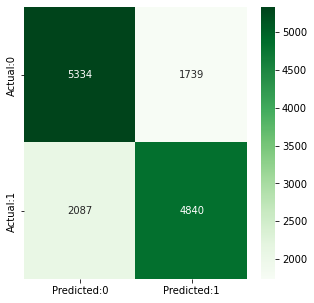


 ACCURACY SCORE  :  0.6265058354595355

 PRECISION SCORE :  0.7305754825820712

 RECALL SCORE :  0.6265058354595355

 F1 SCORE :  0.6326339999289015


In [ ]:
# To find the accuracy result for DTA using ENTROPY algorithm used for calculating Information gain...
from sklearn.ensemble import RandomForestClassifier
    
RDF_E = RandomForestClassifier(criterion='entropy',random_state=0)
RDF_E.fit(x_train,y_train)
RDF_pred_E = RDF_E.predict(x_test)
RDF_accuracy_E = cross_val_score(RDF_E, x, y, scoring="recall", cv = 5).mean()
RDF_precision_E = cross_val_score(RDF_E, x, y, scoring="precision", cv = 5).mean()
RDF_recall_score_E = cross_val_score(RDF_E, x, y, scoring="recall", cv = 5).mean()
RDF_Score_E = cross_val_score(RDF_E, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, RDF_pred_E))
print('\n CONFUSION MATRIX : \n')
cm= confusion_matrix(y_test, RDF_pred_E)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', RDF_accuracy_E)
print('\n PRECISION SCORE : ', RDF_precision_E)
print('\n RECALL SCORE : ', RDF_recall_score_E)
print('\n F1 SCORE : ',RDF_Score_E)


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      7073
           1       0.73      0.70      0.71      6927

    accuracy                           0.73     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.73      0.72     14000


 CONFUSION MATRIX : 



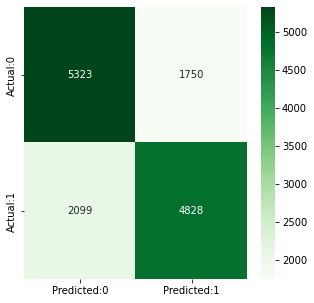


 ACCURACY SCORE  :  0.6767857142857142

 PRECISION SCORE :  0.7233450773475132

 RECALL SCORE :  0.6145260459259678

 F1 SCORE : 0.6163754182426685


In [ ]:
# To find the accuracy result for DTA using CART algorithm used for calculating Gini index...
from sklearn.ensemble import RandomForestClassifier
    
RDF_GI = RandomForestClassifier(criterion='gini', random_state=0)
RDF_GI.fit(x_train,y_train)
RDF_pred_GI= RDF.predict(x_test)
RDF_accuracy_GI = cross_val_score(RDF_GI, x, y, scoring="accuracy", cv = 5).mean()
RDF_precision_GI = cross_val_score(RDF_GI, x, y, scoring="precision", cv = 5).mean()
RDF_recall_score_GI = cross_val_score(RDF_GI, x, y, scoring="recall", cv = 5).mean()
RDF_Score_GI = cross_val_score(RDF_GI, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, RDF_pred_GI))
print('\n CONFUSION MATRIX : \n')
cm= confusion_matrix(y_test, RDF_pred_GI)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ',RDF_accuracy_GI )
print('\n PRECISION SCORE : ',RDF_precision_GI)
print('\n RECALL SCORE : ',RDF_recall_score_GI)
print('\n F1 SCORE :',RDF_Score_GI)

RESULT

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["CRITERIA","Accuracy","Precision", "Recall", "F1"]) 
  
# Add rows 
myTable.add_row(['Information Gain',RDF_accuracy_E,RDF_precision_E ,RDF_recall_score_E ,RDF_Score_E]) 
myTable.add_row(['Gini Index',RDF_accuracy_GI,RDF_precision_GI ,RDF_recall_score_GI ,RDF_Score_GI])   
print(myTable)

+------------------+--------------------+--------------------+--------------------+--------------------+
|     CRITERIA     |      Accuracy      |     Precision      |       Recall       |         F1         |
+------------------+--------------------+--------------------+--------------------+--------------------+
| Information Gain | 0.6265058354595355 | 0.7305754825820712 | 0.6265058354595355 | 0.6326339999289015 |
|    Gini Index    | 0.6767857142857142 | 0.7233450773475132 | 0.6145260459259678 | 0.6163754182426685 |
+------------------+--------------------+--------------------+--------------------+--------------------+


PREDICTION

In [ ]:
print("The prediction value for Entropy Method : ")
print(RDF_pred_E)

The prediction value for Entropy Method : 
[0 0 0 ... 1 0 1]


In [ ]:
print("The prediction value for Entropy Method : ")
print(RDF_pred_GI)

The prediction value for Entropy Method : 
[0 0 0 ... 1 0 1]


TESTING

# **NAIVE BAYES**



 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.55      0.91      0.68      7073
           1       0.72      0.23      0.35      6927

    accuracy                           0.57     14000
   macro avg       0.63      0.57      0.52     14000
weighted avg       0.63      0.57      0.52     14000


 CONFUSION MATRIX
 [[6463  610]
 [5350 1577]]

 ACCURACY SCORE  :  0.5478857142857143

 PRECISION SCORE :  0.77136845352596

 RECALL SCORE :  0.13642562624369034

 F1 SCORE : 0.23055541681527297


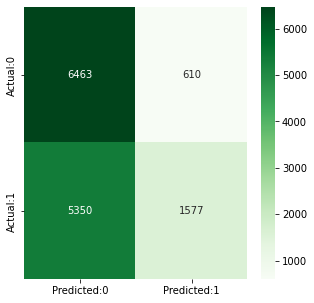

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

bayes_accuracy = cross_val_score(classifier, x, y, scoring="accuracy", cv = 5).mean()
bayes_precision = cross_val_score(classifier, x, y, scoring="precision", cv = 5).mean()
bayes_recall_score = cross_val_score(classifier, x, y, scoring="recall", cv = 5).mean()
bayes_Score = cross_val_score(classifier, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, y_pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, y_pred))
print('\n ACCURACY SCORE  : ', bayes_accuracy)
print('\n PRECISION SCORE : ', bayes_precision)
print('\n RECALL SCORE : ',bayes_recall_score)
print('\n F1 SCORE :',bayes_Score)
cm= confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()


In [ ]:
myTable = PrettyTable(["METRICS", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(["Naive Bayes",bayes_accuracy,bayes_precision,bayes_recall_score,bayes_Score])
print(myTable)

+-------------+--------------------+------------------+---------------------+---------------------+
|   METRICS   |      ACCURACY      | PRECISION SCORE  |     RECALL SCORE    |       F1 SCORE      |
+-------------+--------------------+------------------+---------------------+---------------------+
| Naive Bayes | 0.5478857142857143 | 0.77136845352596 | 0.13642562624369034 | 0.23055541681527297 |
+-------------+--------------------+------------------+---------------------+---------------------+


In [ ]:
print("The prediction value for NB Method : ")
print(y_pred)

The prediction value for NB Method : 
[0 0 0 ... 0 0 1]


In [ ]:
# # Predicting a new result - target 0
# print(classifier.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))

In [ ]:
# # Predicting a new result - target 1
# print(classifier.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))

# **LOGISTIC REGRESSION**


In [1]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_Pred= logreg.predict(x_test)
logreg_accuracy = cross_val_score(logreg, x, y, scoring="accuracy", cv = 5).mean()
logreg_precision = cross_val_score(logreg, x, y, scoring="precision", cv = 5).mean()
logreg_recall_score = cross_val_score(logreg, x, y, scoring="recall", cv = 5).mean()
logreg_f1_score = cross_val_score(logreg, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, logreg_Pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, logreg_Pred))
print('\n ACCURACY SCORE  : ',logreg_accuracy)
print('\n PRECISION SCORE : ',logreg_precision)
print('\n RECALL SCORE : ', logreg_recall_score)
print('\n F1 SCORE : ', logreg_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,logreg_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_M= LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg_M.fit(x_train, y_train)
logreg_Pred_M= logreg_M.predict(x_test)
logreg_accuracy_M= cross_val_score(logreg_M, x, y, scoring="accuracy", cv = 5).mean()
logreg_precision_M= cross_val_score(logreg_M, x, y, scoring="precision", cv = 5).mean()
logreg_recall_score_M = cross_val_score(logreg_M, x, y, scoring="recall", cv = 5).mean()
logreg_f1_score_M = cross_val_score(logreg_M, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, logreg_Pred_M))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, logreg_Pred_M))
print('\n ACCURACY SCORE  : ',logreg_accuracy_M)
print('\n PRECISION SCORE : ',logreg_precision_M)
print('\n RECALL SCORE : ', logreg_recall_score_M)
print('\n F1 SCORE : ', logreg_f1_score_M)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,logreg_Pred_M)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["CRITERIA","Accuracy","Precision", "Recall", "F1"]) 
  
# Add rows 
myTable.add_row(['Logistic Regression',logreg_accuracy, logreg_precision, logreg_recall_score, logreg_f1_score]) 
myTable.add_row(['MultinomialRegression ',logreg_accuracy_M,logreg_precision_M,logreg_recall_score_M,logreg_recall_score_M])   
print(myTable)

In [ ]:
# # Predicting a new result - target 0
# print(logreg.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))

In [ ]:
# # Predicting a new result - target 1
# print(logreg.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))

# **XGBOOST**


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      7073
           1       0.75      0.69      0.72      6927

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000


 CONFUSION MATRIX
 [[5510 1563]
 [2120 4807]]

 ACCURACY SCORE  :  0.654442857142857

 PRECISION SCORE :  0.5618148423351603

 RECALL SCORE :  0.6156946826758147

 F1 SCORE :  0.574292512618294

 CONFUSION MATRIX



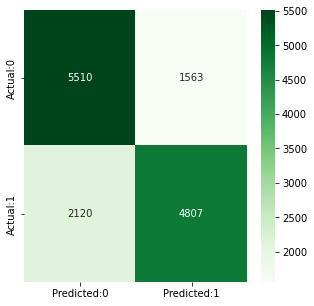

In [ ]:
from xgboost import XGBClassifier

XG = XGBClassifier()

XG.fit(x_train,y_train)

XG_Pred = XG.predict(x_test)
XG_accuracy = cross_val_score(XG, x, y, scoring="accuracy", cv = 5).mean()
XG_precision = cross_val_score(XG, x, y, scoring="precision", cv = 5).mean()
XG_recall_score = cross_val_score(XG, x, y, scoring="recall", cv = 5).mean()
XG_f1_score = cross_val_score(XG, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, XG_Pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, XG_Pred))
print('\n ACCURACY SCORE  : ', XG_accuracy)
print('\n PRECISION SCORE : ', XG_precision)
print('\n RECALL SCORE : ', XG_recall_score)
print('\n F1 SCORE : ', XG_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,XG_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['XGBoosting',XG_accuracy,XG_precision ,XG_recall_score ,XG_f1_score]) 

print(myTable)

+------------+-------------------+--------------------+--------------------+-------------------+
|  METRICS   |   ACCURACY SCORE  |  PRECISION SCORE   |    RECALL SCORE    |      F1 SCORE     |
+------------+-------------------+--------------------+--------------------+-------------------+
| XGBoosting | 0.654442857142857 | 0.5618148423351603 | 0.6156946826758147 | 0.574292512618294 |
+------------+-------------------+--------------------+--------------------+-------------------+


# **GRADIENT BOOST**


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.72      0.77      0.75      7073
           1       0.75      0.70      0.72      6927

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000


 CONFUSION MATRIX
 [[5458 1615]
 [2075 4852]]

 ACCURACY SCORE  :  0.6620285714285714

 PRECISION SCORE :  0.7644862413792098

 RECALL SCORE :  0.6142653108015159

 F1 SCORE :  0.577858680177457

 CONFUSION MATRIX



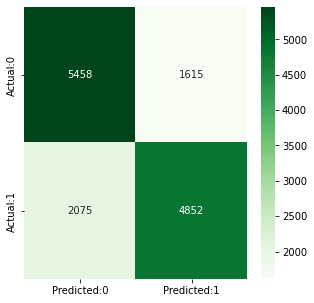

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
GB_Pred = GB.predict(x_test)
GB_accuracy = cross_val_score(GB, x, y, scoring="accuracy", cv = 5).mean()
GB_precision = cross_val_score(GB, x, y, scoring="precision", cv = 5).mean()
GB_recall_score = cross_val_score(GB, x, y, scoring="recall", cv = 5).mean()
GB_f1_score = cross_val_score(GB, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, GB_Pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, GB_Pred))
print('\n ACCURACY SCORE  : ', GB_accuracy)
print('\n PRECISION SCORE : ', GB_precision)
print('\n RECALL SCORE : ', GB_recall_score)
print('\n F1 SCORE : ', GB_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,GB_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['Gradient Boosting',GB_accuracy,GB_precision ,GB_recall_score ,GB_f1_score]) 

print(myTable)

+-------------------+--------------------+--------------------+--------------------+-------------------+
|      METRICS      |   ACCURACY SCORE   |  PRECISION SCORE   |    RECALL SCORE    |      F1 SCORE     |
+-------------------+--------------------+--------------------+--------------------+-------------------+
| Gradient Boosting | 0.6620285714285714 | 0.7644862413792098 | 0.6142653108015159 | 0.577858680177457 |
+-------------------+--------------------+--------------------+--------------------+-------------------+


# **ADABOOST**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      7073
           1       0.76      0.66      0.71      6927

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000


 CONFUSION MATRIX
 [[5653 1420]
 [2345 4582]]

 ACCURACY SCORE  :  0.6394428571428572

 PRECISION SCORE :  0.5623014071748774

 RECALL SCORE :  0.5967695826186392

 F1 SCORE :  0.5603459064426906

 CONFUSION MATRIX



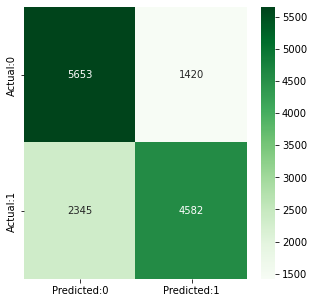

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
model1 = abc.fit(x_train, y_train)
y_pred = model1.predict(x_test)

ada_accuracy = cross_val_score(abc, x, y, scoring="accuracy", cv = 5).mean()
ada_precision = cross_val_score(abc, x, y, scoring="precision", cv = 5).mean()
ada_recall_score = cross_val_score(abc, x, y, scoring="recall", cv = 5).mean()
ada_f1_score = cross_val_score(abc, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, y_pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, y_pred))
print('\n ACCURACY SCORE  : ', ada_accuracy)
print('\n PRECISION SCORE : ',ada_precision)
print('\n RECALL SCORE : ', ada_recall_score)
print('\n F1 SCORE : ', ada_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()



In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7073
           1       0.76      0.66      0.71      6927

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['AdaBoosting',ada_accuracy,ada_precision ,ada_recall_score ,ada_f1_score]) 

print(myTable)

+-------------+--------------------+--------------------+--------------------+--------------------+
|   METRICS   |   ACCURACY SCORE   |  PRECISION SCORE   |    RECALL SCORE    |      F1 SCORE      |
+-------------+--------------------+--------------------+--------------------+--------------------+
| AdaBoosting | 0.6394428571428572 | 0.5623014071748774 | 0.5967695826186392 | 0.5603459064426906 |
+-------------+--------------------+--------------------+--------------------+--------------------+


# **CORRELATION MATRIX**

In [ ]:
#importing the dataset
data = pd.read_csv('/content/Prediction_70000.csv')
display(data)
all(data)

,TARGET,KNN,SVM,DT,RF,NB,LR
0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1
2,1,1,0,1,1,0,0
3,1,0,0,1,1,0,1
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
4995,0,0,1,0,0,0,1
4996,1,1,1,1,1,0,0
4997,0,0,1,0,0,0,0
4998,0,0,0,0,0,0,0


True

In [ ]:
cor={'KNN':0,'SVM':1,'DT':2,'RF':3,'NB':4,'LR':5} #index value 

In [ ]:
rows, cols = (7, 7)
val = [[0 for i in range(cols)] for j in range(rows)] #creating the double array
for i in range(1,7):
  for j in range(1,7):
    tt=0
    tf=0
    ft=0
    ff=0
    for count in range(62):
      if data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
        tt=tt+1
      elif data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
        tf=tf+1
      elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
        ft=ft+1
      elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
        ff=ff+1
    try:
      correlation = int (2*ff)/int (tf+ft+(2*ff))
    except ZeroDivisionError:
	    correlation = 0
    val[i][j] = correlation
    # print('\n')

In [ ]:
for i in range(1,7):
  print(f"         {data.columns[i]}",end="")
print("\n")

for i in range(1,7):
  print(data.columns[i],end ="       ")
  for j in range(1,7):
    print(round(val[i][j],2),end = "       ")
  print('\n')



# NB - LR = 0.89
# 0.78 0.77

# KNN - NB and KNN - LR = 0.74
# SVM - NB and SVM - LR = 0.73

# SVM - KNN = 0.7
# 0.80  0.85

# RF - NB and RF - LR = 0.5
# KNN - RF =  0.46
# DT - RF = 0.4
# SVM - RF = 0.38
# KNN - DT = 0.35
# DT - SVM = 0.3

#KNN-LR=0.91
#SVM-KNN=0.75
#SVM-LR=0.67
#KNN-NB=0.6
#NB-LR=0.55

         KNN         SVM         DT         RF         NB         LR

KNN       1.0       0.57       0.0       0.0       0.32       0.42       

SVM       0.57       1.0       0.0       0.0       0.44       0.6       

DT       0.0       0.0       0       0       0.0       0.0       

RF       0.0       0.0       0       0       0.0       0.0       

NB       0.32       0.44       0.0       0.0       1.0       0.34       

LR       0.42       0.6       0.0       0.0       0.34       1.0       



In [ ]:
# data = pd.read_csv('/content/Prediction - both testing and traning.csv',usecols=['TARGET','KNN','DT','RF','NB'])

# rows, cols = (7, 7)
# val = [[0 for i in range(cols)] for j in range(rows)] #creating the double array
# for i in range(1,5):
#   for j in range(1,5):
#     tt=0
#     tf=0
#     ft=0
#     ff=0
#     for count in range(62):
#       if data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
#         tt=tt+1
#       elif data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
#         tf=tf+1
#       elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
#         ft=ft+1
#       elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
#         ff=ff+1
#     try:
#       correlation = int (2*ff)/int (tf+ft+(2*ff))
#     except ZeroDivisionError:
# 	    correlation = 0
#     val[i][j] = correlation

In [ ]:
# for i in range(1,5):
#   print(f"        {data.columns[i]}",end="")
# print("\n")

# for i in range(1,5):
#   print(data.columns[i],end ="      ")
#   for j in range(1,5):
#     print(round(val[i][j],2),end = "      ")
#   print('\n')

# **STACKING**

In [ ]:
# from numpy import mean
# from numpy import std
# import pandas as pd
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import StackingClassifier
# from matplotlib import pyplot
# from matplotlib.pyplot import figure
# figure(dpi=80, facecolor='w', edgecolor='k')
 
  
# # get a stacking of models
# def get_stacking():
#   # define the base models
#   level0 = list()
#   level0.append(('cart', DecisionTreeClassifier()))
#   level0.append(('rf', RandomForestClassifier()))
#   level0.append(('lr',LogisticRegression()))

#   # define meta learner model
#   level1 = KNeighborsClassifier()

#   # define the stacking ensemble
#   model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#   return model

# # get a list of models to evaluate
# def get_models():
#   models = dict()
#   models['Decision tree'] = DecisionTreeClassifier()
#   models['Random Forest'] = RandomForestClassifier()
#   models['Logistic Regression'] = LogisticRegression()
#   models['Stacking'] = get_stacking()
#   return models
 
# # evaluate a give model using cross-validation
# def evaluate_model(model):
#   cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#   scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#   scores1 = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
#   scores2 = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
#   scores3 = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
#   return scores,scores1,scores2,scores3
 
# # define dataset
# df = pd.read_csv('/content/heart(303).csv',usecols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
# df1 = pd.read_csv('/content/heart(303).csv',usecols=['target'])
# X,y = df,df1.target

# # get the models to evaluate
# models = get_models()

# # evaluate the models and store results
# results,results1,results2,results3,names= list(),list(),list(),list(),list()
# for name, model in models.items():
#   scores= evaluate_model(model)
#   scores1=evaluate_model(model)
#   scores2=evaluate_model(model)
#   scores3=evaluate_model(model)
#   results.append(scores)
#   results1.append(scores1)
#   results2.append(scores2)
#   results3.append(scores3)
#   names.append(name)
#   print('>%s -> %.3f (%.3f)' % (name+"- Accuracy Score  ", mean(scores), std(scores)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Precision Score ", mean(scores1), std(scores1)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Recall Score    ", mean(scores2), std(scores2)))
#   print('>%s -> %.3f (%.3f)' % (name+"- F1 Score        ", mean(scores3), std(scores3)))
#   print('\n')

In [ ]:
# # get a stacking ensemble of models
# def get_stacking():
#   # define the base models
#   level0 = list()
#   level0.append(('cart', DecisionTreeClassifier()))
#   level0.append(('lr',LogisticRegression()))
#   level0.append(('knn',KNeighborsClassifier()))

#   # define meta learner model
#   level1 = RandomForestClassifier()

#   # define the stacking ensemble
#   model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#   return model
 
# # get a list of models to evaluate
# def get_models():
#   models = dict()
#   models['Decision tree'] = DecisionTreeClassifier()
#   models['LogisticRegression'] = LogisticRegression()
#   models['KNN'] = KNeighborsClassifier()
#   models['Stacking'] = get_stacking()
#   return models
 
# # evaluate a give model using cross-validation
# def evaluate_model(model):
#   cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#   scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#   scores1 = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
#   scores2 = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
#   scores3 = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
#   return scores,scores1,scores2,scores3
 
# # define dataset
# df = pd.read_csv('/content/heart(303).csv',usecols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
# df1 = pd.read_csv('/content/heart(303).csv',usecols=['target'])
# X,y = df,df1.target

# # get the models to evaluate
# models = get_models()

# # evaluate the models and store results
# results,results1,results2,results3,names= list(),list(),list(),list(),list()
# for name, model in models.items():
#   scores= evaluate_model(model)
#   scores1=evaluate_model(model)
#   scores2=evaluate_model(model)
#   scores3=evaluate_model(model)
#   results.append(scores)
#   results1.append(scores1)
#   results2.append(scores2)
#   results3.append(scores3)
#   names.append(name)
#   print('>%s -> %.3f (%.3f)' % (name+"- Accuracy Score  ", mean(scores), std(scores)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Precision Score ", mean(scores1), std(scores1)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Recall Score    ", mean(scores2), std(scores2)))
#   print('>%s -> %.3f (%.3f)' % (name+"- F1 Score        ", mean(scores3), std(scores3)))
#   print('\n')
  

In [ ]:
# # get a stacking ensemble of models
# def get_stacking():
#   # define the base models
#   level0 = list()
#   level0.append(('rf', RandomForestClassifier()))
#   level0.append(('knn',KNeighborsClassifier()))

#   # define meta learner model
#   level1 = LogisticRegression()

#   # define the stacking ensemble
#   model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#   return model
 
# # get a list of models to evaluate
# def get_models():
#   models = dict()
#   models['Random Forest'] = RandomForestClassifier()
#   models['KNN'] = KNeighborsClassifier()
#   models['Stacking'] = get_stacking()
#   return models
 
# # evaluate a give model using cross-validation
# def evaluate_model(model):
#   cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#   scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#   scores1 = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
#   scores2 = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
#   scores3 = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
#   return scores,scores1,scores2,scores3
 
# # define dataset
# df = pd.read_csv('/content/heart(303).csv',usecols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
# df1 = pd.read_csv('/content/heart(303).csv',usecols=['target'])
# X,y = df,df1.target

# # get the models to evaluate
# models = get_models()

# # evaluate the models and store results
# results,results1,results2,results3,names= list(),list(),list(),list(),list()
# for name, model in models.items():
#   scores= evaluate_model(model)
#   scores1=evaluate_model(model)
#   scores2=evaluate_model(model)
#   scores3=evaluate_model(model)
#   results.append(scores)
#   results1.append(scores1)
#   results2.append(scores2)
#   results3.append(scores3)
#   names.append(name)
#   print('>%s -> %.3f (%.3f)' % (name+"- Accuracy Score  ", mean(scores), std(scores)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Precision Score ", mean(scores1), std(scores1)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Recall Score    ", mean(scores2), std(scores2)))
#   print('>%s -> %.3f (%.3f)' % (name+"- F1 Score        ", mean(scores3), std(scores3)))
#   print('\n')
  

# **LEVEL - 3**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create Learners per layer
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator= LogisticRegression())

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

print('\n ------------ Prediction of Stacking for training dataset ------------')
clf.fit(x_train, y_train)
Stacking = clf.predict(x_train)
Stacking_accuracy = cross_val_score(clf, x_train, y_train, scoring="accuracy",cv = 5).mean()
Stacking_precision = cross_val_score(clf, x_train, y_train, scoring="precision",cv = 5).mean()
Stacking_recall_score = cross_val_score(clf , x_train, y_train, scoring="recall",cv = 5).mean()
Stacking_f1_score = cross_val_score(clf, x_train, y_train, scoring="f1",cv = 5).mean()
print('\n ACCURACY SCORE  : ', Stacking_accuracy)
print('\n PRECISION SCORE : ', Stacking_precision)
print('\n RECALL SCORE : ', Stacking_recall_score)
print('\n F1 SCORE : ', Stacking_f1_score)

print('\n ------------ Prediction of Stacking for testing dataset ------------')
clf.fit(x_test, y_test)
Stacking = clf.predict(x_test)
Stacking_accuracy = cross_val_score(clf, x_test, y_test, scoring="accuracy",cv = 5).mean()
Stacking_precision = cross_val_score(clf, x_test, y_test, scoring="precision",cv = 5).mean()
Stacking_recall_score = cross_val_score(clf , x_test,y_test, scoring="recall",cv = 5).mean()
Stacking_f1_score = cross_val_score(clf, x_test, y_test, scoring="f1",cv = 5).mean()
print('\n ACCURACY SCORE  : ', Stacking_accuracy)
print('\n PRECISION SCORE : ', Stacking_precision)
print('\n RECALL SCORE : ', Stacking_recall_score)
print('\n F1 SCORE : ', Stacking_f1_score)


 ------------ Prediction of Stacking for training dataset ------------

 ACCURACY SCORE  :  0.7077678571428571

 PRECISION SCORE :  0.7194003584432009

 RECALL SCORE :  0.6834094348032306

 F1 SCORE :  0.7008329844291064

 ------------ Prediction of Stacking for testing dataset ------------

 ACCURACY SCORE  :  0.7001428571428572

 PRECISION SCORE :  0.7047121126842202

 RECALL SCORE :  0.6785065716473658

 F1 SCORE :  0.6912614214582021


# **DEEP NEURAL NETWORK**

In [ ]:
import random
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model1 = Sequential()
#model1.add(Dense(500, input_dim=11, activation='relu'))
#model1.add(Dense(500, input_dim=200, activation='relu'))
#model1.add(Dense(320, input_dim=200, activation='relu'))
#model1.add(Dense(1, activation='tanh'))


In [ ]:
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
#,tf.keras.metrics.Recall()


In [ ]:
# fit the keras model on the dataset
kera=model.fit(x_train, y_train, epochs=80, batch_size=13,validation_data=(x_val, y_val))
#kera=model.fit(x, y, epochs=150, batch_size=13)

Epoch 1/80
4847/4847 [==============================] - 12s 2ms/step - loss: 67.5160 - accuracy: 0.5157 - recall: 0.5300 - precision: 0.5146 - val_loss: 88.0267 - val_accuracy: 0.4969 - val_recall: 5.6786e-04 - val_precision: 0.5000
Epoch 2/80
4847/4847 [==============================] - 10s 2ms/step - loss: 17.8146 - accuracy: 0.5293 - recall: 0.5374 - precision: 0.5282 - val_loss: 47.7924 - val_accuracy: 0.5591 - val_recall: 0.9358 - val_precision: 0.5354
Epoch 3/80
4847/4847 [==============================] - 10s 2ms/step - loss: 15.9642 - accuracy: 0.5398 - recall: 0.5480 - precision: 0.5385 - val_loss: 37.2809 - val_accuracy: 0.4970 - val_recall: 0.0011 - val_precision: 0.5714
Epoch 4/80
4847/4847 [==============================] - 10s 2ms/step - loss: 13.8161 - accuracy: 0.5466 - recall: 0.5538 - precision: 0.5453 - val_loss: 43.6859 - val_accuracy: 0.4970 - val_recall: 8.5179e-04 - val_precision: 0.6000
Epoch 5/80
4847/4847 [==============================] - 10s 2ms/step - loss:

In [ ]:
# evaluate the keras model
_, DNNaccuracy,recall,precision = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (DNNaccuracy*100))
print('recall: %.2f' % (recall*100))
print('precision: %.2f' % (precision*100))
F1 = 2 * (precision * recall) / (precision + recall)
print('F1 score: %.2f' % (F1))


438/438 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5329 - recall: 0.5167 - precision: 0.5287
Accuracy: 53.29
recall: 51.67
precision: 52.87
F1 score: 0.52


In [ ]:
myTable = PrettyTable(["METRICS", "ACCURACY","PRECISION SCORE","RECALL SCORE"]) 
  
# Add rows 
myTable.add_row(["DNN",DNNaccuracy,precision,recall])
print(myTable)

+---------+--------------------+--------------------+--------------------+
| METRICS |      ACCURACY      |  PRECISION SCORE   |    RECALL SCORE    |
+---------+--------------------+--------------------+--------------------+
|   DNN   | 0.5329285860061646 | 0.5286558270454407 | 0.5166738629341125 |
+---------+--------------------+--------------------+--------------------+


In [ ]:
kera.history
kera.history['accuracy']
np.mean(kera.history['accuracy'])

0.5135257925838232

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 13)                169       
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


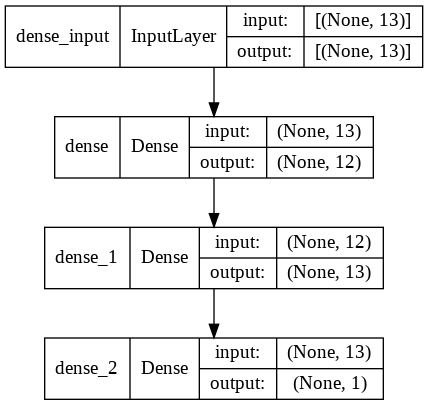

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

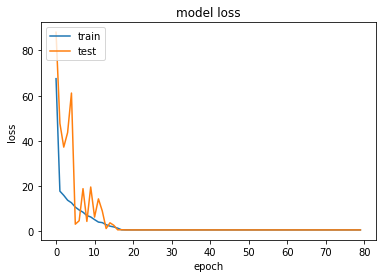

In [ ]:
plt.plot(kera.history["loss"])
plt.plot(kera.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

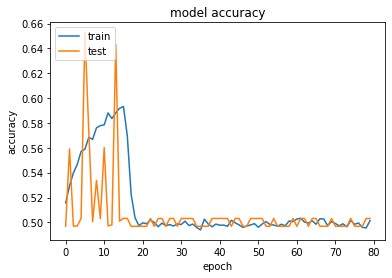

In [ ]:
plt.plot(kera.history['accuracy'])
plt.plot(kera.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("The prediction value for DNN Method : ")
print(kera)

The prediction value for DNN Method : 
